In [120]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando base de dados

In [121]:
df = pd.read_excel(r'C:\Users\jeanl\Desktop\IMPORTANTES\IFPE\Projeto IA - 2ª unidade\data\car.xlsx')

display(df)

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Tratamento inicial dos dados (tradução para pt-br e tratamento das variáveis de string para inteiros)

In [122]:
colunas_replace = {'buying': 'Preço de Compra',
           'maint': 'Preço de Manutenção',
           'doors': 'N° de Portas',
           'persons': 'Capacidade de Pessoas',
           'lug_boot': 'Tamanho do Porta-malas',
           'safety': 'Segurança',
           'evaluation': 'Avaliação do Carro'}

valores_replace = {'vhigh': 'Muito Alto',
           'high': 'Alto',
           'med': 'Médio',
           'low': 'Baixo',
           '5more': '5',
           'more': '5',
           'small': 'Pequeno',
           'big': 'Grande',
           'unacc': 'Inaceitável',
           'acc': 'Aceitável',
           'good': 'Bom',
           'vgood': 'Muito bom'}

df = df.rename(columns=colunas_replace)
df = df.replace(valores_replace)

display(df)

,Preço de Compra,Preço de Manutenção,N° de Portas,Capacidade de Pessoas,Tamanho do Porta-malas,Segurança,Avaliação do Carro
0,Muito Alto,Muito Alto,2,2,Pequeno,Baixo,Inaceitável
1,Muito Alto,Muito Alto,2,2,Pequeno,Médio,Inaceitável
2,Muito Alto,Muito Alto,2,2,Pequeno,Alto,Inaceitável
3,Muito Alto,Muito Alto,2,2,Médio,Baixo,Inaceitável
4,Muito Alto,Muito Alto,2,2,Médio,Médio,Inaceitável
...,...,...,...,...,...,...,...
1723,Baixo,Baixo,5,5,Médio,Médio,Bom
1724,Baixo,Baixo,5,5,Médio,Alto,Muito bom
1725,Baixo,Baixo,5,5,Grande,Baixo,Inaceitável
1726,Baixo,Baixo,5,5,Grande,Médio,Bom


Plotando gráficos de distribuição para observar o balanceamento das classes

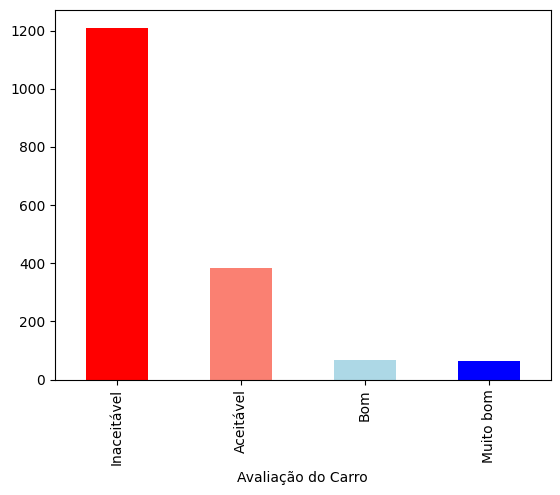

In [123]:
df["Avaliação do Carro"].value_counts().plot(kind="bar", color=["red" ,"salmon", "lightblue","blue"]);

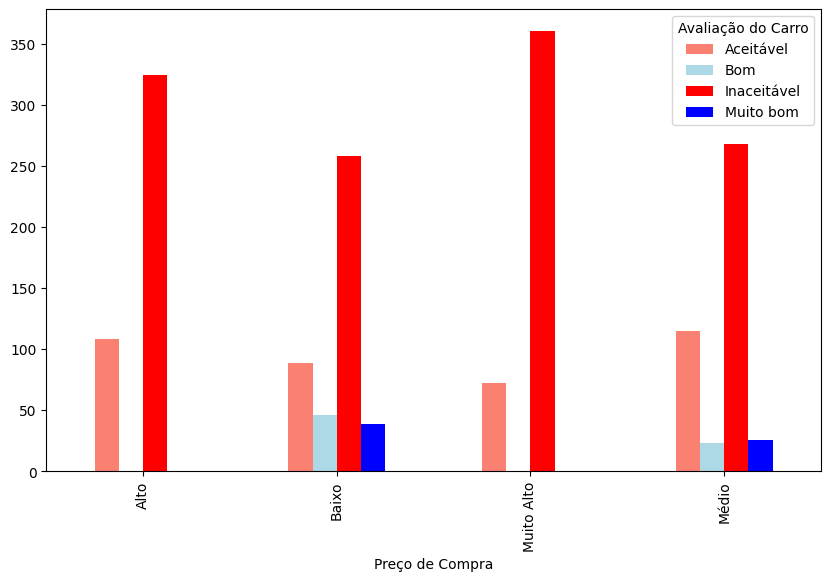

In [124]:
pd.crosstab(df["Preço de Compra"], df["Avaliação do Carro"]).plot(
    kind="bar", figsize=(10,6), color=["salmon", "lightblue", "red", "blue"]);

Criando os dummies das variáveis categóricas (todas menos a target)

In [125]:
df = pd.get_dummies(df, columns=['Preço de Compra', 'Preço de Manutenção', 'N° de Portas', 'Capacidade de Pessoas', 'Tamanho do Porta-malas', 'Segurança'],
                            prefix=['compra', 'mant', 'portas', 'pessoas', 'mala', 'sec'], prefix_sep='_')

# Para a target criaremos um dicionário para substituir os valores de string por números, mas ainda mantendo a lógica de nominalidade da variável

dicionario_avaliacao = {'Inaceitável': '0',
                        'Aceitável': '1',
                        'Bom': '2',
                        'Muito bom': '3'}

df['Avaliação do Carro'] = df['Avaliação do Carro'].replace(dicionario_avaliacao)

df = df.astype(int)

display(df)

,Avaliação do Carro,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
0,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,3,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


Matriz de correlação para entender melhor sobre a ligação entre as variáveis e os resultados

<Axes: >

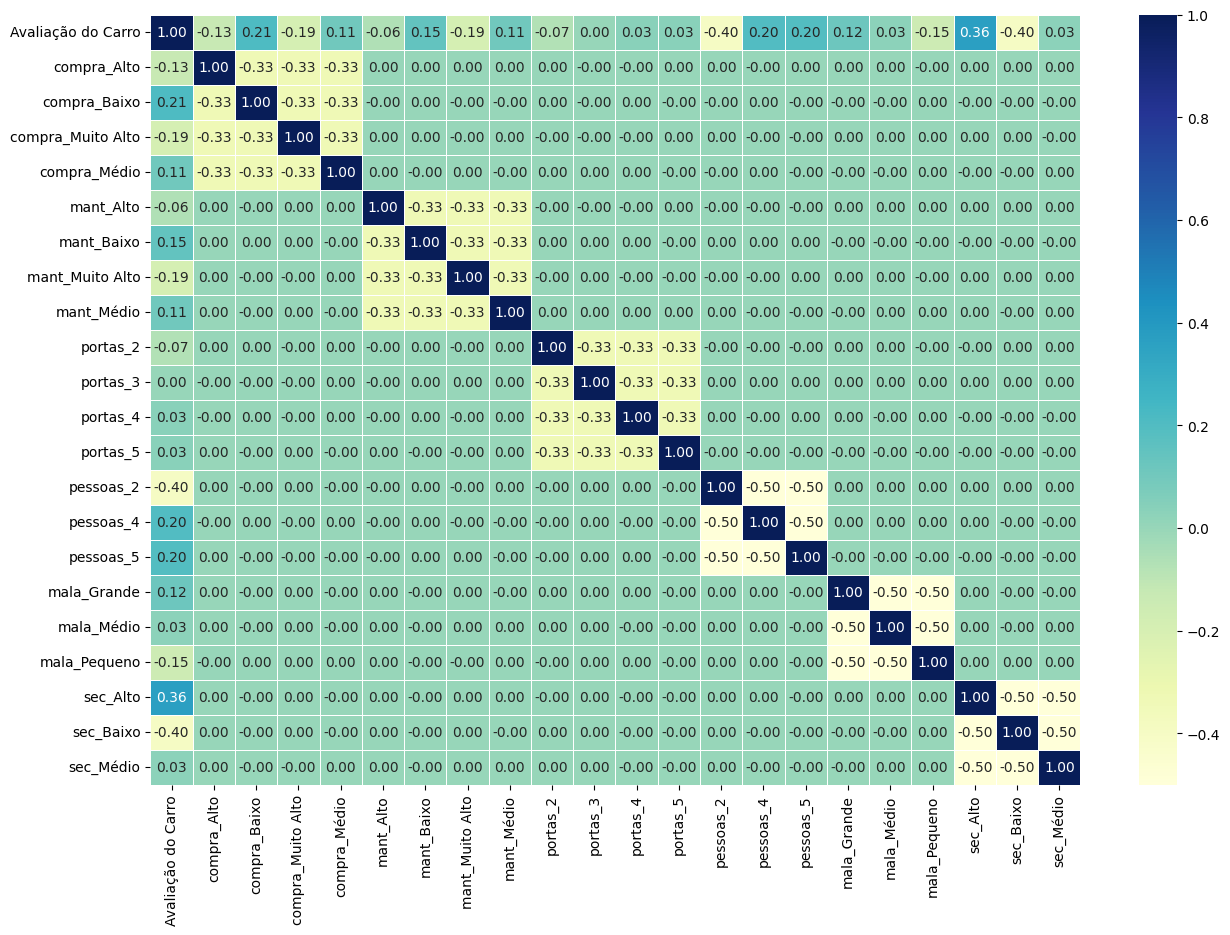

In [126]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")

Preparando os dados para iniciar o treinamento

In [127]:
# Isolando a variável que vamos prever dos outros dados
X = df.drop("Avaliação do Carro", axis=1)
y = df["Avaliação do Carro"]

X.head()


,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,portas_3,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [128]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Avaliação do Carro, dtype: int64

In [129]:
# Dividindo os dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.head()

,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,portas_3,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
628,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
417,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1443,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1013,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
796,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1


Treinamento (topicos sklearn 1.6 / 1.7 / 1.9 / 1.10 / 1.11)

MODELO RANDOM FOREST

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

modelo_rf = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2', None]
    }

random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=param_distributions, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Melhores parâmetros:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 177}


In [131]:
param_refined = {
    'n_estimators': [170, 172],
    'max_depth': [10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=modelo_rf,
    param_grid=param_refined,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados após o refinamento da busca:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros encontrados após o refinamento da busca:
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 170}


In [132]:
best_rf_model = RandomForestClassifier(
    max_depth = 15,
    max_features = None,
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_estimators = 150,
    random_state = 42
)

best_rf_model.fit(X_train, y_train)

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusão:')
print(cm)

print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))


Acurácia no treinamento: 1.0
Acurácia no teste: 0.9826589595375722
Matriz de confusão:
[[235   2   0   0]
 [  0  75   2   1]
 [  0   1  15   0]
 [  0   0   0  15]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       237
           1       0.96      0.96      0.96        78
           2       0.88      0.94      0.91        16
           3       0.94      1.00      0.97        15

    accuracy                           0.98       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346



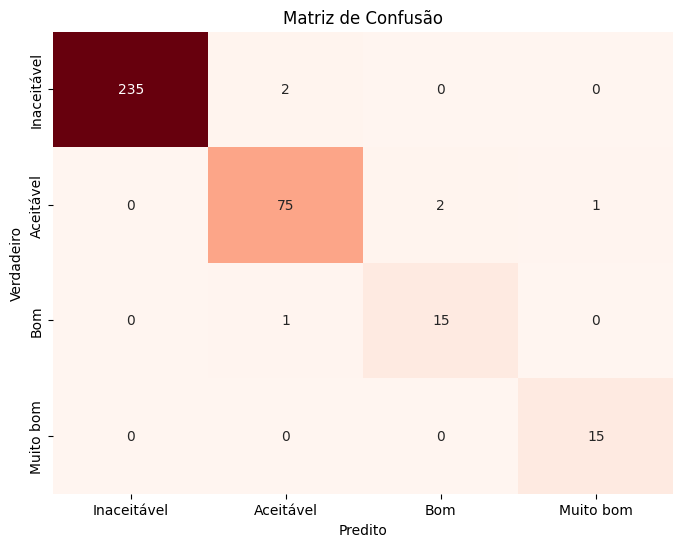

In [133]:
class_names = ['Inaceitável', 'Aceitável', 'Bom', 'Muito bom'] 

# Criar a visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()



Modelo KNeighbors

In [134]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

param_distributions = {
    'n_neighbors': randint(5, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Realizar a busca aleatória de parâmetros
random_search = RandomizedSearchCV(
    estimator=modelo_knn,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados na busca aleatória:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros encontrados na busca aleatória:
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


In [135]:
# Refinar a busca com GridSearchCV
param_refined = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(
    estimator=modelo_knn,
    param_grid=param_refined,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados após o refinamento da busca:")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros encontrados após o refinamento da busca:
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [136]:
best_knn_model = KNeighborsClassifier(
    n_neighbors=10,
    p=2,
    weights='distance'
)

best_knn_model.fit(X_train, y_train)

# Fazer previsões
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Calcular acurácia
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusão:')
print(cm)

print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))

Acurácia no treinamento: 1.0
Acurácia no teste: 0.9075144508670521
Matriz de confusão:
[[235   2   0   0]
 [ 13  65   0   0]
 [  1  11   4   0]
 [  0   4   1  10]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       237
           1       0.79      0.83      0.81        78
           2       0.80      0.25      0.38        16
           3       1.00      0.67      0.80        15

    accuracy                           0.91       346
   macro avg       0.88      0.69      0.74       346
weighted avg       0.91      0.91      0.90       346



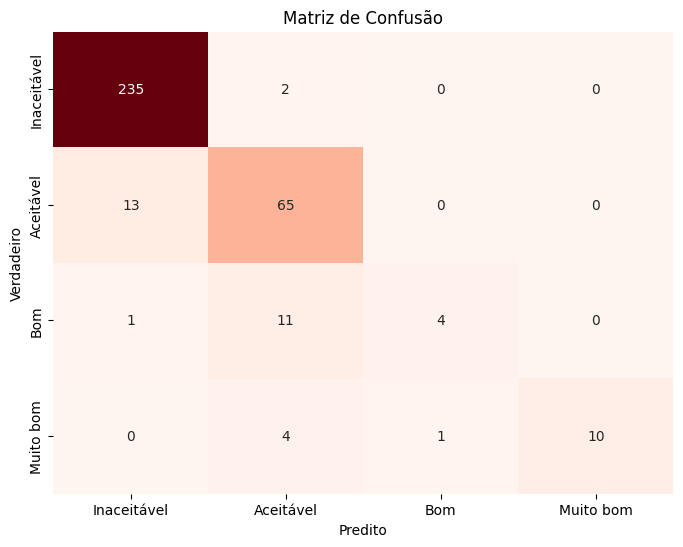

In [137]:
# Nomes das classes
class_names = ['Inaceitável', 'Aceitável', 'Bom', 'Muito bom']

# Criar a visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Modelo GaussianProcessClassifier (GPC)

In [138]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


kernel = C(1.0) * RBF(length_scale=1.0)

modelo_gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Busca por parâmetros comentada para economizar tempo de execução, já achamos os melhores parâmetros, mas esse modelo leva muito tempo. 
# # Definindo o grid de parâmetros
# param_grid = {
#     'kernel': [
#         C(1.0) * RBF(length_scale=0.1),
#         C(1.0) * RBF(length_scale=1.0),
#         C(1.0) * RBF(length_scale=10.0)
#     ],
#     'max_iter_predict': [300, 350]
# }

# halving_grid_search = HalvingGridSearchCV(
#     estimator=modelo_gpc,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# # Ajuste do modelo
# halving_grid_search.fit(X_train, y_train)

# # Resultados
# print("Melhores parâmetros encontrados:", halving_grid_search.best_params_)

In [139]:
# Definindo o kernel com os melhores parâmetros
kernel = C(1.0) * RBF(length_scale=10)

# Criando o modelo GPC com os melhores parâmetros
best_gpc_model = GaussianProcessClassifier(kernel=kernel, max_iter_predict=300, random_state=42)

# Ajustando o modelo com os dados de treinamento
best_gpc_model.fit(X_train, y_train)

# Fazendo previsões nos conjuntos de treinamento e teste
y_train_pred = best_gpc_model.predict(X_train)
y_test_pred = best_gpc_model.predict(X_test)

# Calculando a acurácia
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusão:')
print(cm)

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))

Acurácia no treinamento: 1.0
Acurácia no teste: 0.9855491329479769
Matriz de Confusão:
[[236   1   0   0]
 [  0  76   2   0]
 [  0   1  14   1]
 [  0   0   0  15]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.97      0.97      0.97        78
           2       0.88      0.88      0.88        16
           3       0.94      1.00      0.97        15

    accuracy                           0.99       346
   macro avg       0.95      0.96      0.95       346
weighted avg       0.99      0.99      0.99       346



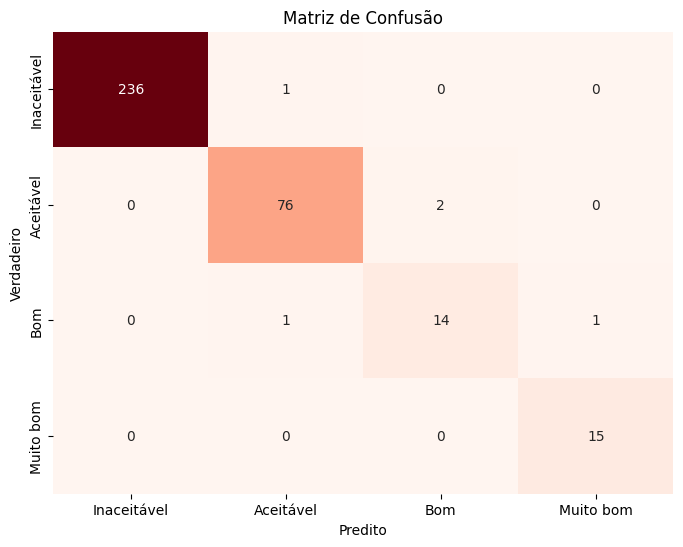

In [140]:
# Criando a visualização da matriz de confusão
class_names = ['Inaceitável', 'Aceitável', 'Bom', 'Muito bom'] 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Modelo Naive Bayes

In [141]:
from sklearn.naive_bayes import CategoricalNB

# Inicializar o modelo Naive Bayes para dados categóricos
modelo_cat_nb = CategoricalNB()

# Treinar o modelo
modelo_cat_nb.fit(X_train, y_train)

# Fazer previsões
y_train_pred = modelo_cat_nb.predict(X_train)
y_test_pred = modelo_cat_nb.predict(X_test)

# Avaliar o desempenho
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusão:')
print(cm)

print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))

Acurácia no treinamento: 0.8871201157742402
Acurácia no teste: 0.8526011560693642
Matriz de confusão:
[[208  29   0   0]
 [  4  69   5   0]
 [  0  10   5   1]
 [  0   2   0  13]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       237
           1       0.63      0.88      0.73        78
           2       0.50      0.31      0.38        16
           3       0.93      0.87      0.90        15

    accuracy                           0.85       346
   macro avg       0.76      0.74      0.74       346
weighted avg       0.88      0.85      0.86       346



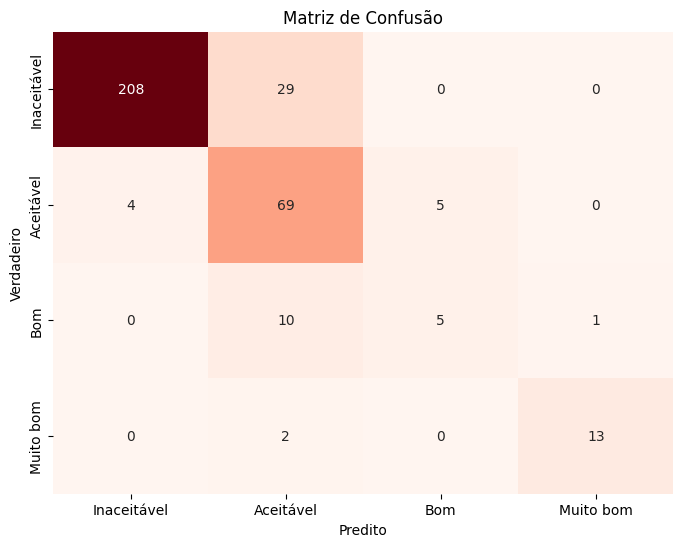

In [142]:
class_names = ['Inaceitável', 'Aceitável', 'Bom', 'Muito bom']

# Criar a visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Modelo Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

modelo_dt = DecisionTreeClassifier(random_state=42)

param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

random_search = RandomizedSearchCV(
    estimator=modelo_dt,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados na busca aleatória:")
print(random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros encontrados na busca aleatória:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [144]:
param_refined = {
    'max_depth': [12, 13, 14],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(
    estimator=modelo_dt,
    param_grid=param_refined,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados após o refinamento da busca:")
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros encontrados após o refinamento da busca:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [145]:
best_dt_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    splitter='best',
    random_state=42
)

best_dt_model.fit(X_train, y_train)

y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusão:')
print(cm)

print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))


Acurácia no treinamento: 0.9992764109985528
Acurácia no teste: 0.9595375722543352
Matriz de confusão:
[[233   4   0   0]
 [  6  69   2   1]
 [  0   1  15   0]
 [  0   0   0  15]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       237
           1       0.93      0.88      0.91        78
           2       0.88      0.94      0.91        16
           3       0.94      1.00      0.97        15

    accuracy                           0.96       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.96      0.96      0.96       346



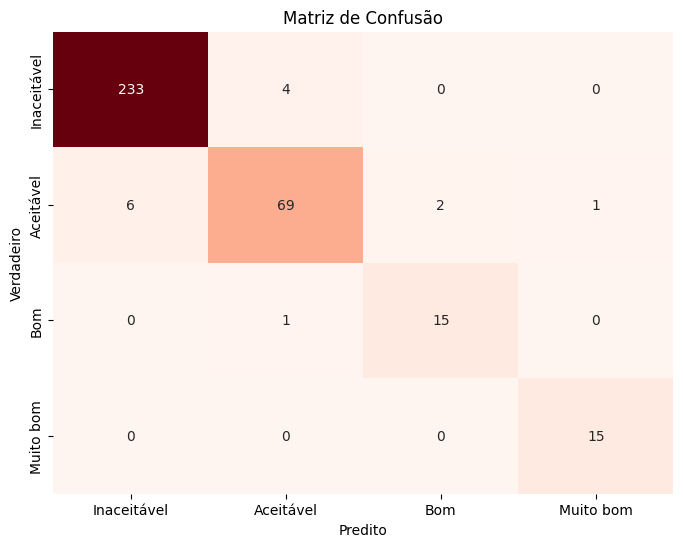

In [146]:
class_names = ['Inaceitável', 'Aceitável', 'Bom', 'Muito bom']

# Criar a visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


In [154]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))

plot_tree(best_dt_model, 
          feature_names=X_train.columns,  
          class_names=['Inaceitável', 'Aceitável', 'Bom', 'Muito bom'],  
          filled=True, 
          rounded=True)

# Ajusta o tamanho da fonte dos rótulos das caixinhas
for label in plt.gca().get_xmajorticklabels():
    label.set_fontsize(20)  # Ajuste o tamanho da fonte conforme necessário

for label in plt.gca().get_ymajorticklabels():
    label.set_fontsize(20)  # Ajuste o tamanho da fonte conforme necessário

plt.gca().set_title('Árvore de Decisão', fontsize=40)
plt.savefig('arvore_decisao.png', dpi=500)
plt.close()
